## Homework 01: due 2022/03/14 13:10

### - SVM tutorial : https://www.kaggle.com/prashant111/svm-classifier-tutorial

### - After you go through the SVM tutorial, you should be able to work on this assignment.

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.



In [1]:
# Import necessary modules
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs, make_circles, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [2]:
# Plotting function (you can modify this block change the plot)
def plot_svc_decision_function(sample_x,sample_y,model, ax=None, mode='train'):
    
    plt.scatter(sample_x[:, 0], sample_x[:, 1], c=sample_y, s=50, cmap='autumn')         
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.set_title(model.kernel)
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    if mode == 'train':
        ax.contour(X, Y, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
        
    else:
        ax.contour(X, Y, P, colors='k',
                   levels=[0], alpha=0.5,
                   linestyles=['-'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### 1. Kernel function and hyper paramters of support vector machine. (30%)
#### Please make the scatter plots with data, and visualize the decision boundary and positive and negative hyperplanes on the following questions.

##### Here is the example of the figure:
![1.png](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW1/img/1.png?raw=true)

##### 1-1. Please use the __**svc**__ function in scikit learn module to compare the impact of the kernel function on the given two data below. Try at least ***linear, poly & rbf*** kernel functions and set hyper parameters ***C, degree*** and ***gamma*** as default. (15%)

In [3]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=2)

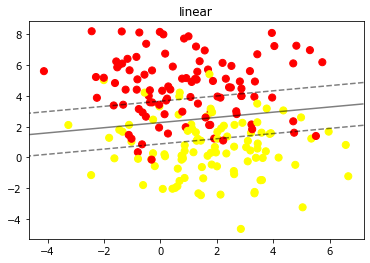

In [4]:
linearsvc = SVC(kernel = "linear")
linearsvc.fit(X,y)
plot_svc_decision_function(X,y,linearsvc)

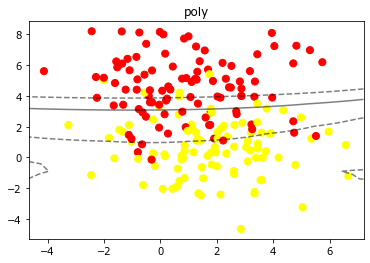

In [5]:
polysvc =SVC(kernel="poly")
polysvc.fit(X,y)
plot_svc_decision_function(X,y,polysvc)

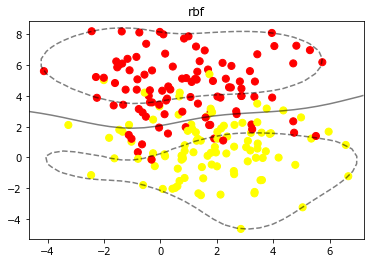

In [6]:
rbfsvc =SVC(kernel="rbf")
rbfsvc.fit(X,y)
plot_svc_decision_function(X,y,rbfsvc)

3個算是能處理縣性分隔的資料，還不能比較優劣


In [7]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=0)

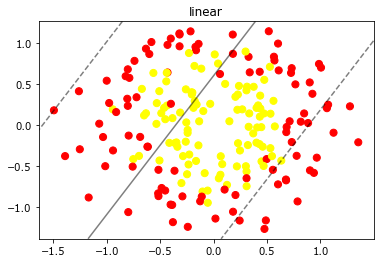

In [8]:
linearsvc = SVC(kernel = "linear")
linearsvc.fit(X,y)
plot_svc_decision_function(X,y,linearsvc)

linear 不能有效處理非線性分開的data


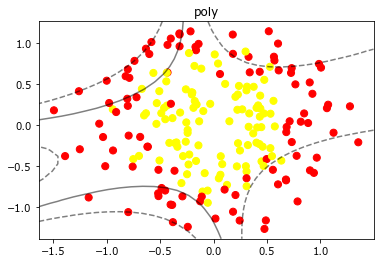

In [9]:
polysvc =SVC(kernel="poly")
polysvc.fit(X,y)
plot_svc_decision_function(X,y,polysvc)

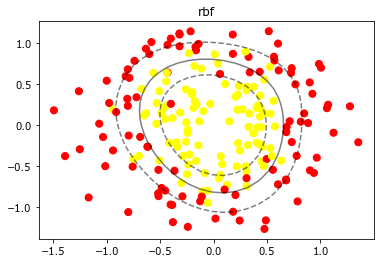

In [10]:
rbfsvc =SVC(kernel="rbf")
rbfsvc.fit(X,y)
plot_svc_decision_function(X,y,rbfsvc)

這兩個算是能處理這樣的資料，不過rbf會比多項式的方式好一些


##### 1-2. Please use the __**svc**__ with ***linear*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***C*** on the given data below. Try ***C=0.001 & 10000*** at least, and you can try more values of ***C*** to prove your observation. (5%)

In [11]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)

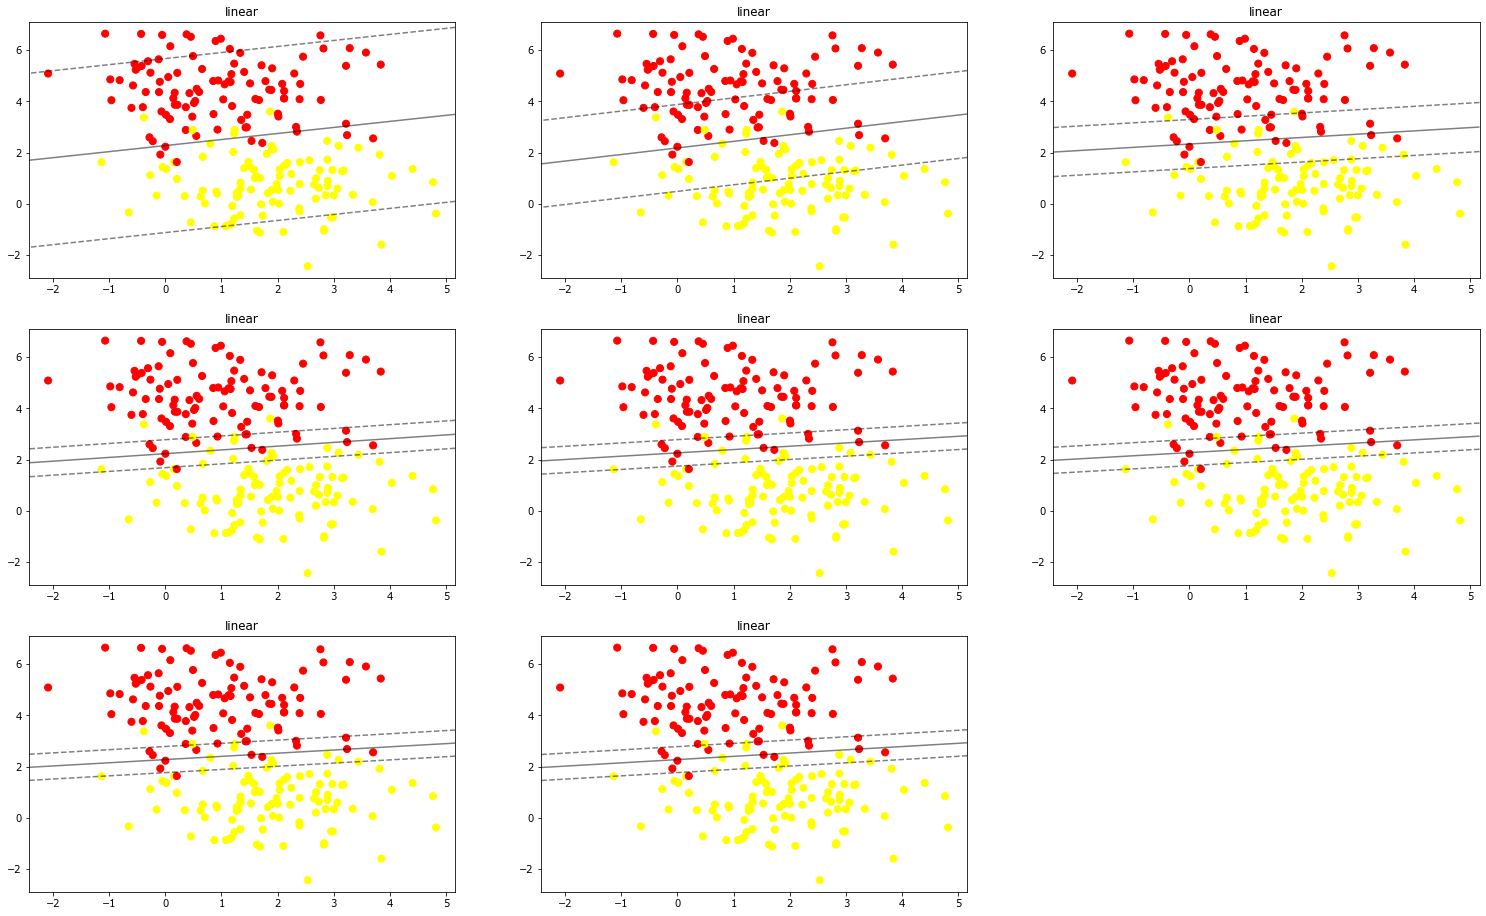

In [12]:
fig = plt.figure(figsize=(26,16))
C = [0.001 , 0.01, 0.1,1,10,100,1000,10000]
list =[1,2,3,4,5,6,7,8]
for axi,i in zip(list, C) :
    ax = plt.subplot(3,3,axi)
    linearsvc = SVC(kernel = "linear", C=i)
    linearsvc.fit(X,y)  
    plot_svc_decision_function(X,y,linearsvc)

C就是懲罰，在C很小時可以看到margin變得很大，表示可以接受大量的誤差，不過這裡可以看到表現得不好，隨著C變大margin也跟著縮小

##### 1-3. Please use the __**svc**__ with ***poly*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***degree*** on the given data below. Try ***degree=3 & 10*** at least, and you can try more values of ***degree*** to prove your observation.(5%)

In [13]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)

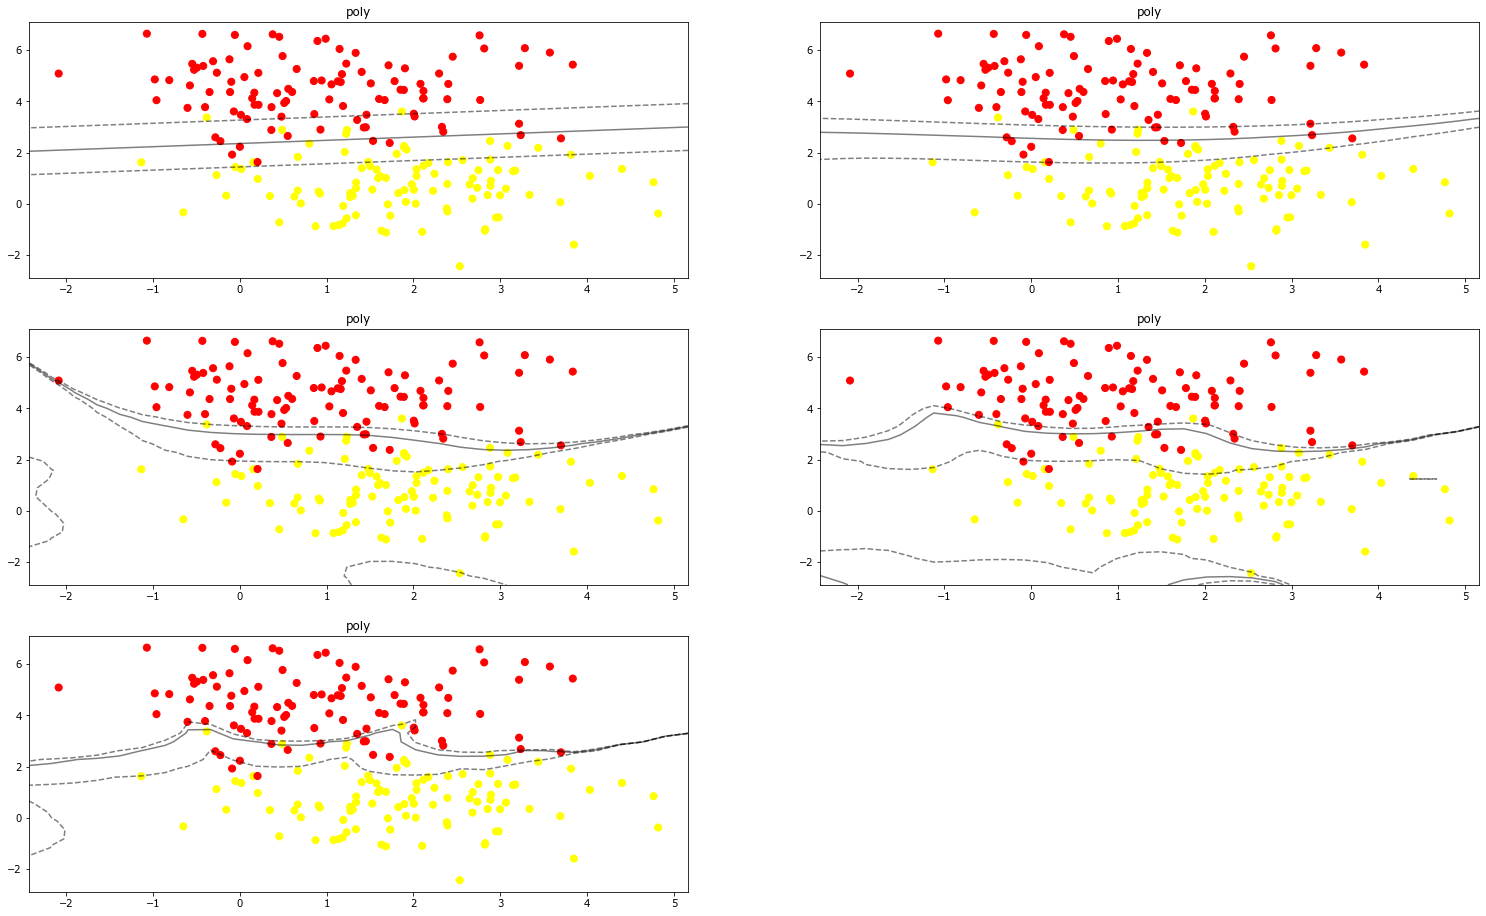

In [14]:
fig = plt.figure(figsize=(26,16))
degree = [1,3,7,10,15]
list = [1,2,3,4,5]
for axi,i in zip(list, degree) :
    ax = plt.subplot(3,2,axi)
    polysvc = SVC(kernel = "poly", degree=i)
    polysvc.fit(X,y)
    plot_svc_decision_function(X,y,polysvc)

degree就是多項式的次方數，看到越大次方overfit的情況就越明顯

##### 1-4. Please use the __**svc**__ with ***rbf*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***gamma*** on the given data below. Try ***gamma=1 & 10*** at least, and you can try more values of ***gamma*** to prove your observation. (5%)

In [15]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.3, factor=0.3, random_state=0)

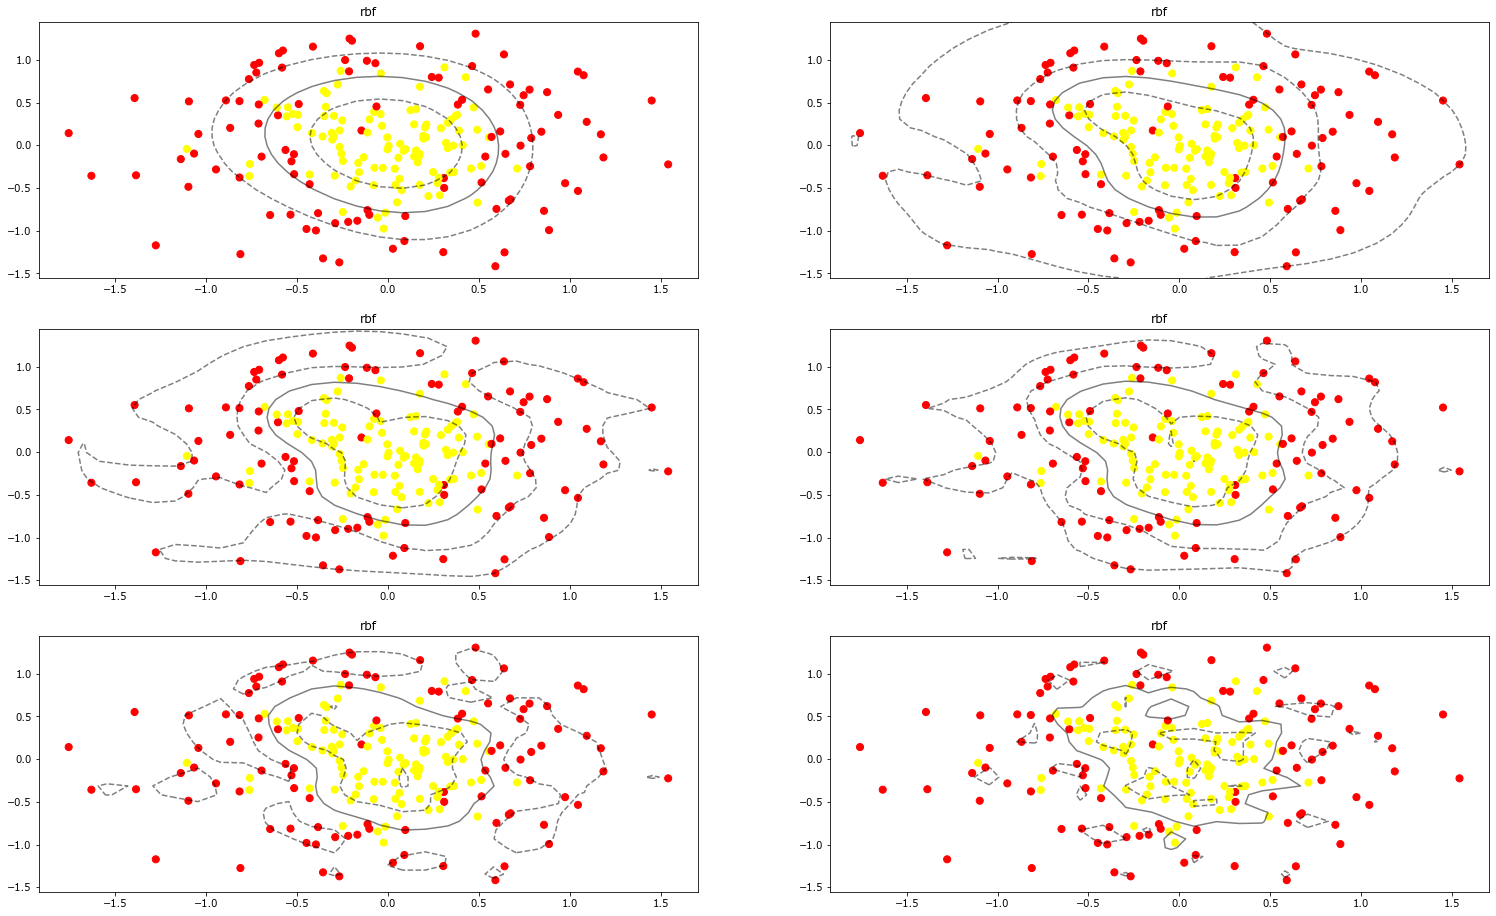

In [16]:
fig = plt.figure(figsize=(26,16))
gamma = [1,4,7,10,15,50]
list = [1,2,3,4,5,6]
for axi,i in zip(list, gamma) :
    rbfsvc = SVC(kernel = "rbf", gamma=i)
    rbfsvc.fit(X,y)
    ax = plt.subplot(3,2,axi)
    plot_svc_decision_function(X,y,rbfsvc)

gamma 代表單一資料的影響，可以看到gamma大時被outlier影響導致overfit

### 2. Model evaluation and hyper parameters searching. (30%)
#### Please make the scatter plots of data, visualize the decision boundary and positive and negative hyperplanes and calculate the accuracy score on training data and testing data on the following questions.

##### Here is the example of the figure:
![2.png](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW1/img/2.png?raw=true)

##### 2-1 Use the ***training ratio 0.8 and 0.2*** to split the given data, and use the ***rbf*** kernel with ***gamma = "auto"***. Please discuss the impact of training ratio. (Split the data with random state 0) (10%)

In [17]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

Model accuracy score with rbf and auto gamma hyperparameters on the train data : 0.9062
Model accuracy score with rbf and auto gamma hyperparameters on the test data : 0.8750


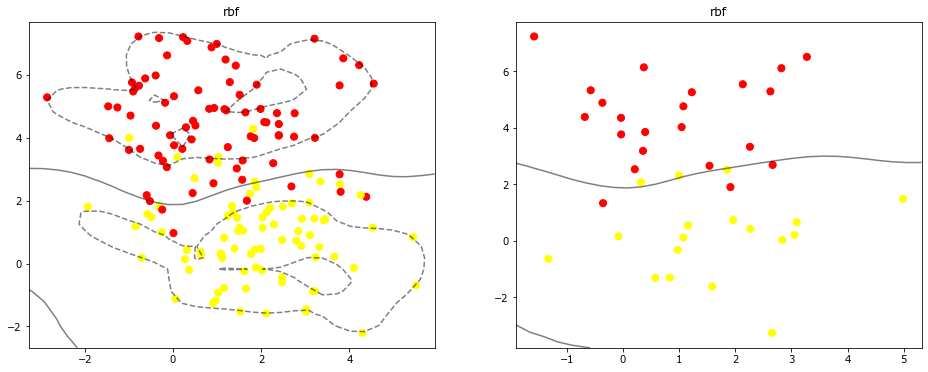

In [18]:
from sklearn.metrics import accuracy_score
fig = plt.figure(figsize=(16,6))
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size= 0.2 ,random_state=0)
rbfsvc = SVC(kernel = "rbf", gamma="auto")
rbfsvc.fit (X_train,y_train)
y_pred = rbfsvc.predict(X_test)
y_trainpred = rbfsvc.predict(X_train)

ax = plt.subplot(1,2,1)
plot_svc_decision_function(X_train,y_train,rbfsvc,mode ='train')
ax = plt.subplot(1,2,2)
plot_svc_decision_function(X_test,y_test,rbfsvc,mode='test')
print('Model accuracy score with rbf and auto gamma hyperparameters on the train data : {0:0.4f}'. format(accuracy_score(y_train,y_trainpred )))
print('Model accuracy score with rbf and auto gamma hyperparameters on the test data : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf and auto gamma hyperparameters on the train data : 0.9500
Model accuracy score with rbf and auto gamma hyperparameters on the test data : 0.8063


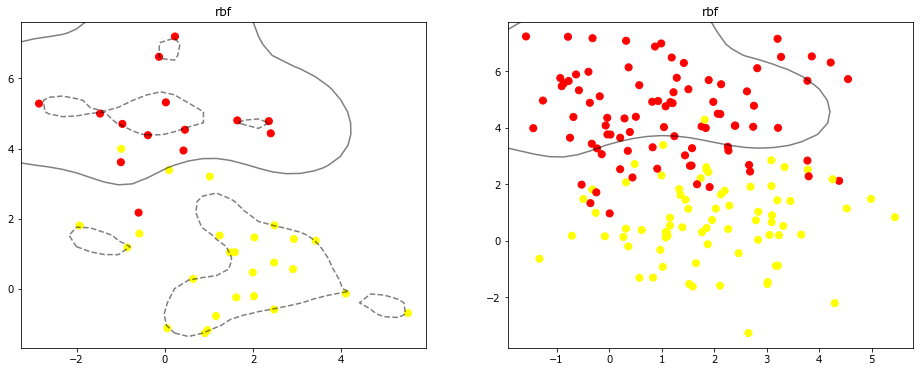

In [19]:
fig = plt.figure(figsize=(16,6))
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size= 0.8 ,random_state=0)
rbfsvc = SVC(kernel = "rbf", gamma="auto")
rbfsvc.fit (X_train,y_train)
y_pred = rbfsvc.predict(X_test)
y_trainpred = rbfsvc.predict(X_train)

ax = plt.subplot(1,2,1)
plot_svc_decision_function(X_train,y_train,rbfsvc,mode ='train')
ax = plt.subplot(1,2,2)
plot_svc_decision_function(X_test,y_test,rbfsvc,mode='test')
print('Model accuracy score with rbf and auto gamma hyperparameters on the train data : {0:0.4f}'. format(accuracy_score(y_train,y_trainpred )))
print('Model accuracy score with rbf and auto gamma hyperparameters on the test data : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

在train data 小的時候 會造成overfit，也就是資料不夠代表真實情況

##### 2-2 Split the given data with ***training ratio 0.8***, and use the ***rbf*** kernel with different values of ***gamma = 1 and 10***. Please discuss the impact of gamma. (Split the data with random state 0) (10%)

In [20]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

Model accuracy score with rbf and gamma =1 hyperparameters on the train data : 0.9187
Model accuracy score with rbf and gamma =1 hyperparameters on the test data : 0.8750


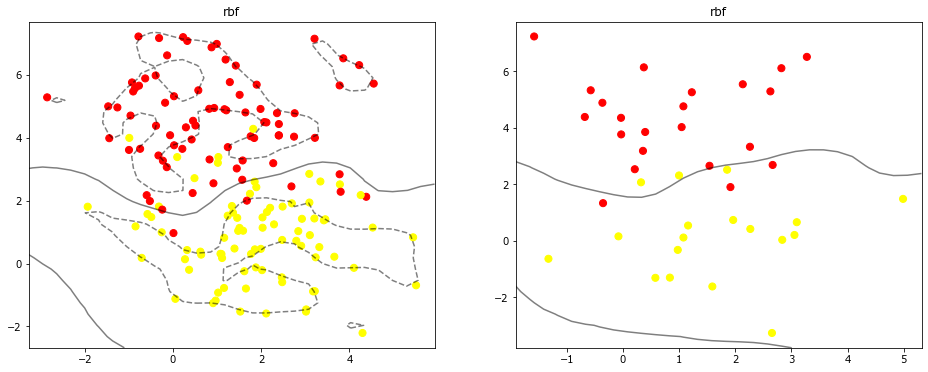

In [21]:
fig = plt.figure(figsize=(16,6))
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size= 0.2 ,random_state=0)
rbfsvc = SVC(kernel = "rbf", gamma=1)
rbfsvc.fit (X_train,y_train)
y_pred = rbfsvc.predict(X_test)
y_trainpred = rbfsvc.predict(X_train)

ax = plt.subplot(1,2,1)
plot_svc_decision_function(X_train,y_train,rbfsvc,mode ='train')
ax = plt.subplot(1,2,2)
plot_svc_decision_function(X_test,y_test,rbfsvc,mode='test')
print('Model accuracy score with rbf and gamma =1 hyperparameters on the train data : {0:0.4f}'. format(accuracy_score(y_train,y_trainpred )))
print('Model accuracy score with rbf and gamma =1 hyperparameters on the test data : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf and gamma =1 hyperparameters on the train data : 0.9812
Model accuracy score with rbf and gamma =1 hyperparameters on the test data : 0.7750


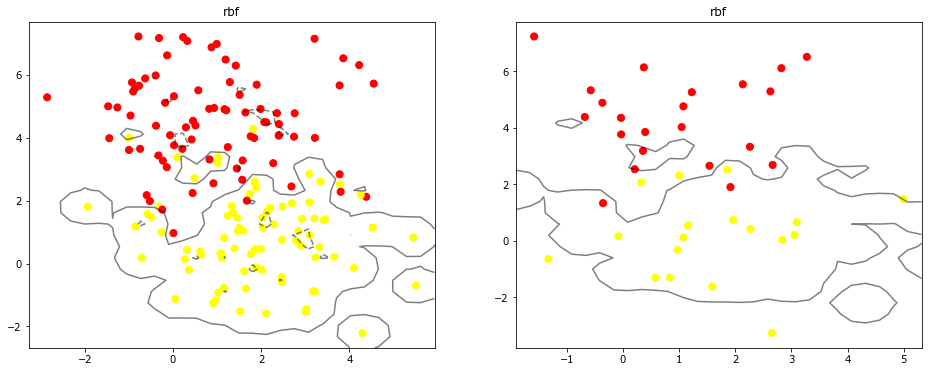

In [22]:
fig = plt.figure(figsize=(16,6))
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size= 0.2 ,random_state=0)
rbfsvc = SVC(kernel = "rbf", gamma=10)
rbfsvc.fit (X_train,y_train)
y_pred = rbfsvc.predict(X_test)
y_trainpred = rbfsvc.predict(X_train)

ax = plt.subplot(1,2,1)
plot_svc_decision_function(X_train,y_train,rbfsvc,mode ='train')
ax = plt.subplot(1,2,2)
plot_svc_decision_function(X_test,y_test,rbfsvc,mode='test')
print('Model accuracy score with rbf and gamma =1 hyperparameters on the train data : {0:0.4f}'. format(accuracy_score(y_train,y_trainpred )))
print('Model accuracy score with rbf and gamma =1 hyperparameters on the test data : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

前面說過gamma使單一資料的重要性放大，明顯的gamma=10時所有outlier都被過度看待導致overfit發生

##### 2-3 Tune the parameter by the given data with ***GridSearchCV*** function and do the 2 fold cross validation. Please try the parameters below to find the best parameter and plot the result and show the accuracy score. 
##### (You can find the details of ***GridSearchCV*** function at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV) (10%)
| | 01 | 02 | 03 | 04 |
|:---:|:---:|:---:|:---:|:---:|
|***Kernel***| Linear | rbf | -| -|
|***C***| 0.1 | 1 | 10|100|
|***gamma***| 1 | 0.1 | 0.01|0.001|

In [23]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

In [24]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel':['linear','rbf'],'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}]
scores = ['precision' , 'recall']

clf = GridSearchCV(SVC(),tuned_parameters , cv =2)
clf.fit(X_train , y_train)
print(clf.best_params_)


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


### 3. Fitting the SVM with the real data. (40%)
#### This question will fit the SVM with real raw data. Try the technique above to reach the highest score.

##### 3-1 Data preprocesssing : Please draw the boxplots of each features and draw another figure with boxplots of each feaures after applying the min max scaling . (10%)

##### Here is the example of figure:
![3.png](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW1/img/3.png?raw=true)

In [25]:
# Do not change the data
data = load_breast_cancer()
data_df = pd.DataFrame(data.data,columns= data.feature_names)


In [26]:
data_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

mean radius                   AxesSubplot(0.125,0.749828;0.110714x0.130172)
mean texture               AxesSubplot(0.257857,0.749828;0.110714x0.130172)
mean perimeter             AxesSubplot(0.390714,0.749828;0.110714x0.130172)
mean area                  AxesSubplot(0.523571,0.749828;0.110714x0.130172)
mean smoothness            AxesSubplot(0.656429,0.749828;0.110714x0.130172)
mean compactness           AxesSubplot(0.789286,0.749828;0.110714x0.130172)
mean concavity                AxesSubplot(0.125,0.593621;0.110714x0.130172)
mean concave points        AxesSubplot(0.257857,0.593621;0.110714x0.130172)
mean symmetry              AxesSubplot(0.390714,0.593621;0.110714x0.130172)
mean fractal dimension     AxesSubplot(0.523571,0.593621;0.110714x0.130172)
radius error               AxesSubplot(0.656429,0.593621;0.110714x0.130172)
texture error              AxesSubplot(0.789286,0.593621;0.110714x0.130172)
perimeter error               AxesSubplot(0.125,0.437414;0.110714x0.130172)
area error  

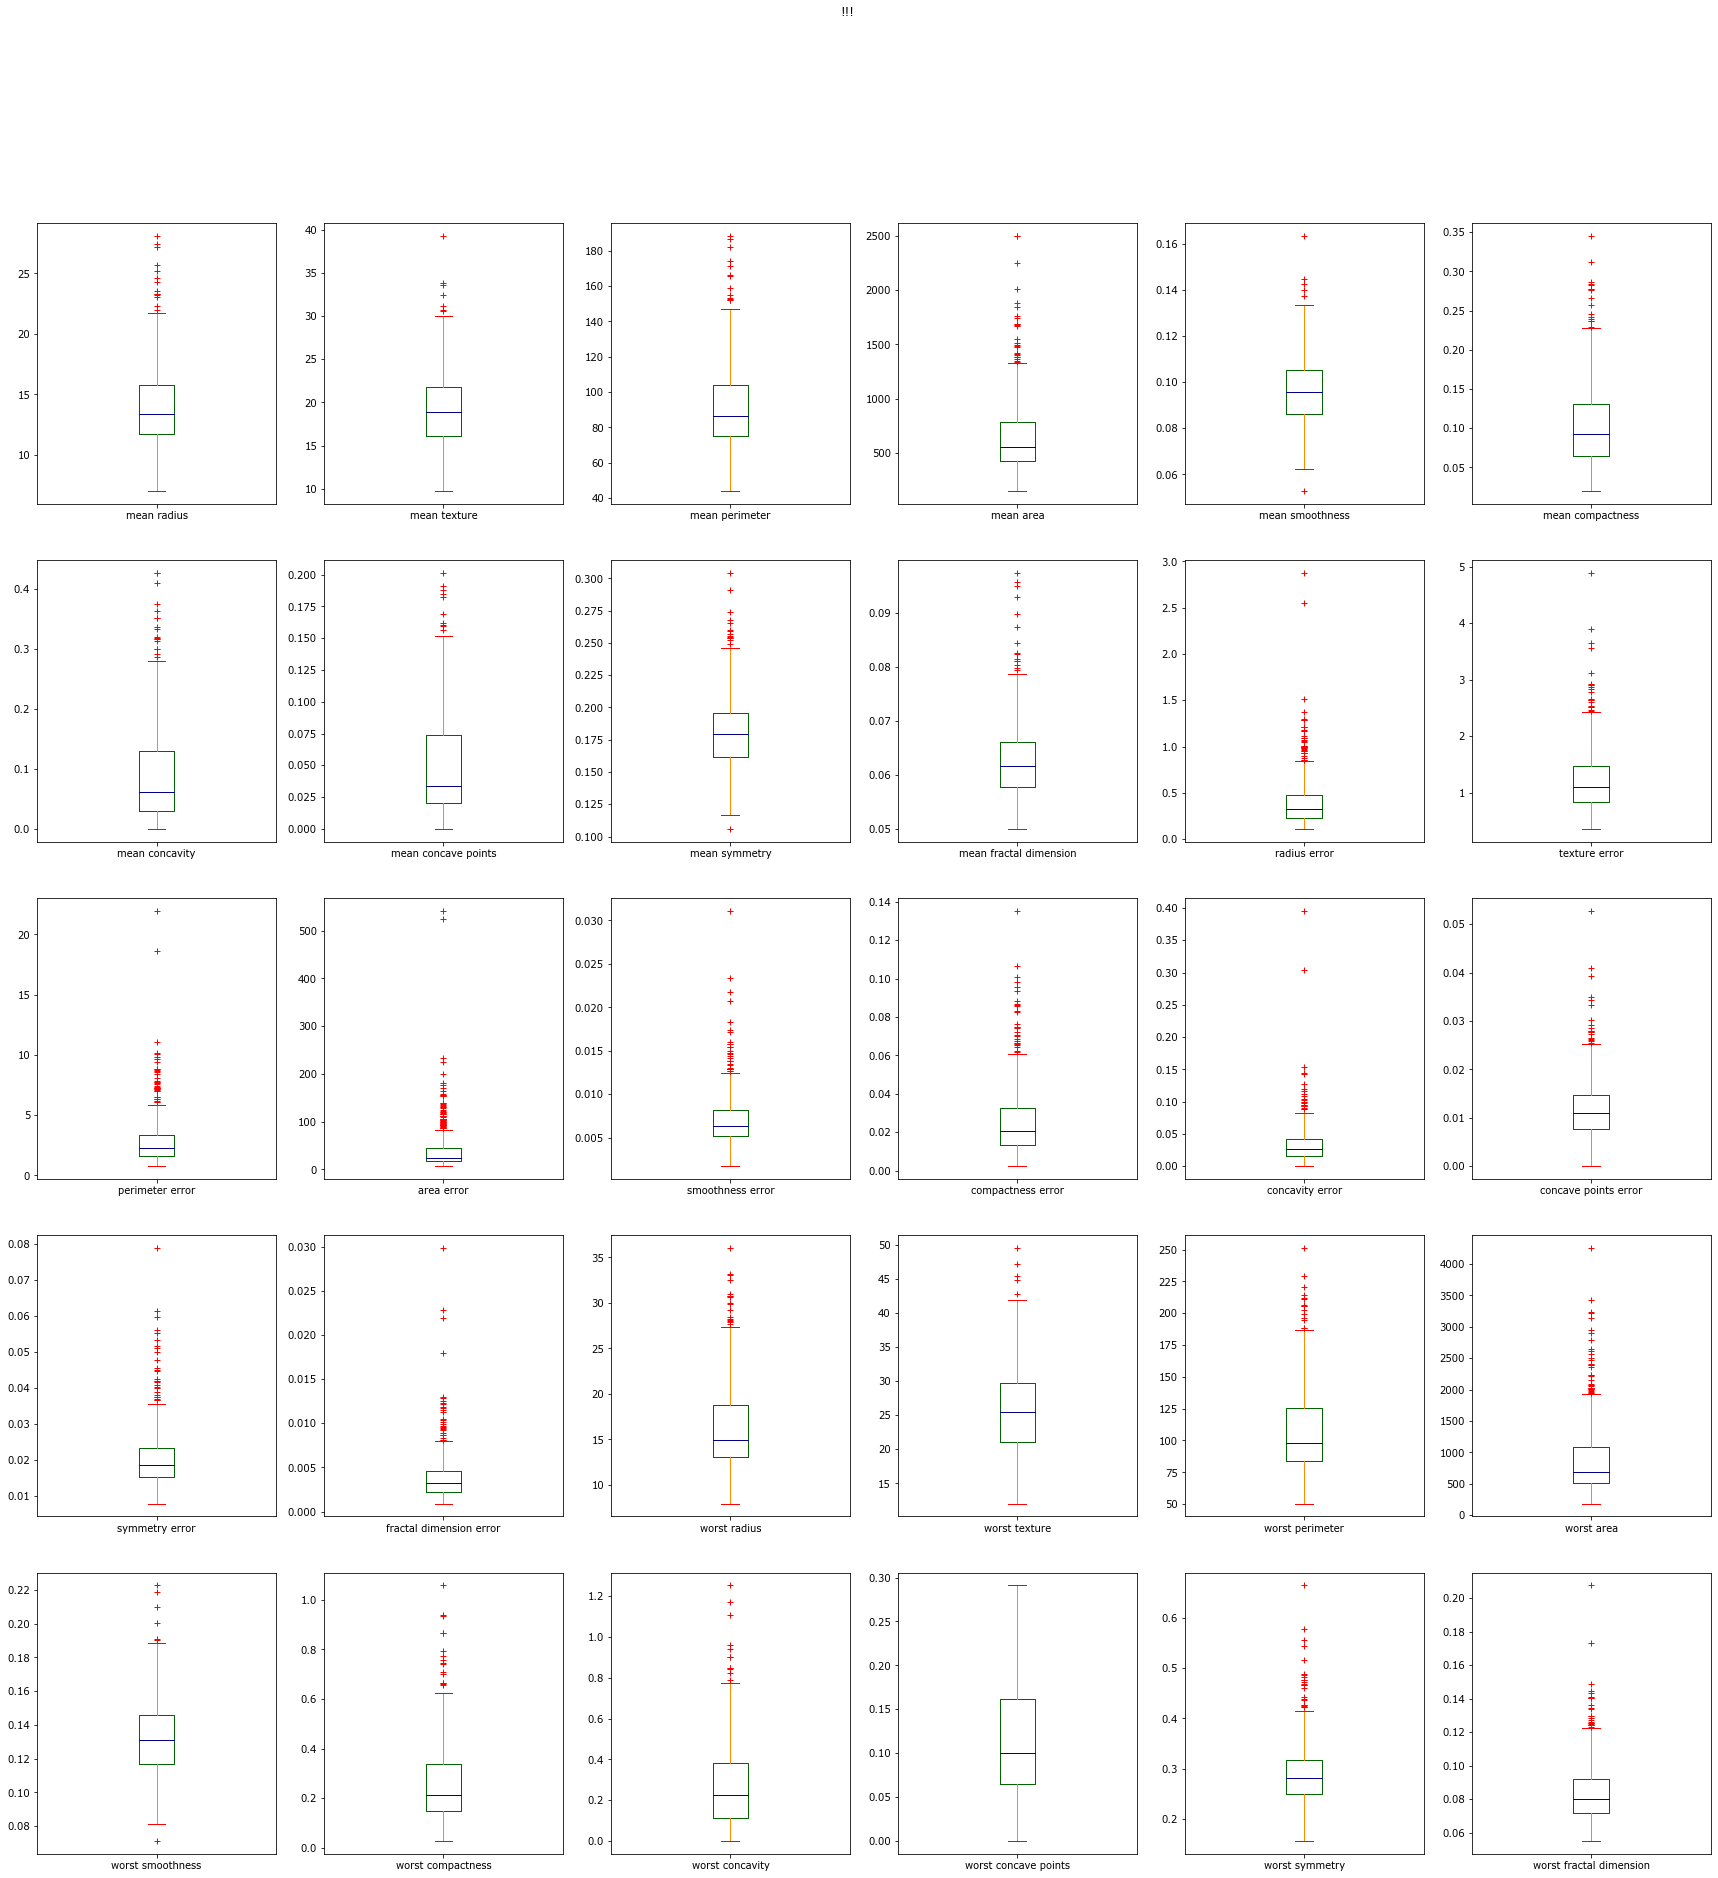

In [27]:
fig , axes = plt.subplots(5,6,figsize=(30, 30))
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Red')
data_df.plot(kind='box' ,ax = axes,subplots =True, title = '!!!',color = color,sym = 'r+',figsize=(8, 8))

mean radius                   AxesSubplot(0.125,0.749828;0.110714x0.130172)
mean texture               AxesSubplot(0.257857,0.749828;0.110714x0.130172)
mean perimeter             AxesSubplot(0.390714,0.749828;0.110714x0.130172)
mean area                  AxesSubplot(0.523571,0.749828;0.110714x0.130172)
mean smoothness            AxesSubplot(0.656429,0.749828;0.110714x0.130172)
mean compactness           AxesSubplot(0.789286,0.749828;0.110714x0.130172)
mean concavity                AxesSubplot(0.125,0.593621;0.110714x0.130172)
mean concave points        AxesSubplot(0.257857,0.593621;0.110714x0.130172)
mean symmetry              AxesSubplot(0.390714,0.593621;0.110714x0.130172)
mean fractal dimension     AxesSubplot(0.523571,0.593621;0.110714x0.130172)
radius error               AxesSubplot(0.656429,0.593621;0.110714x0.130172)
texture error              AxesSubplot(0.789286,0.593621;0.110714x0.130172)
perimeter error               AxesSubplot(0.125,0.437414;0.110714x0.130172)
area error  

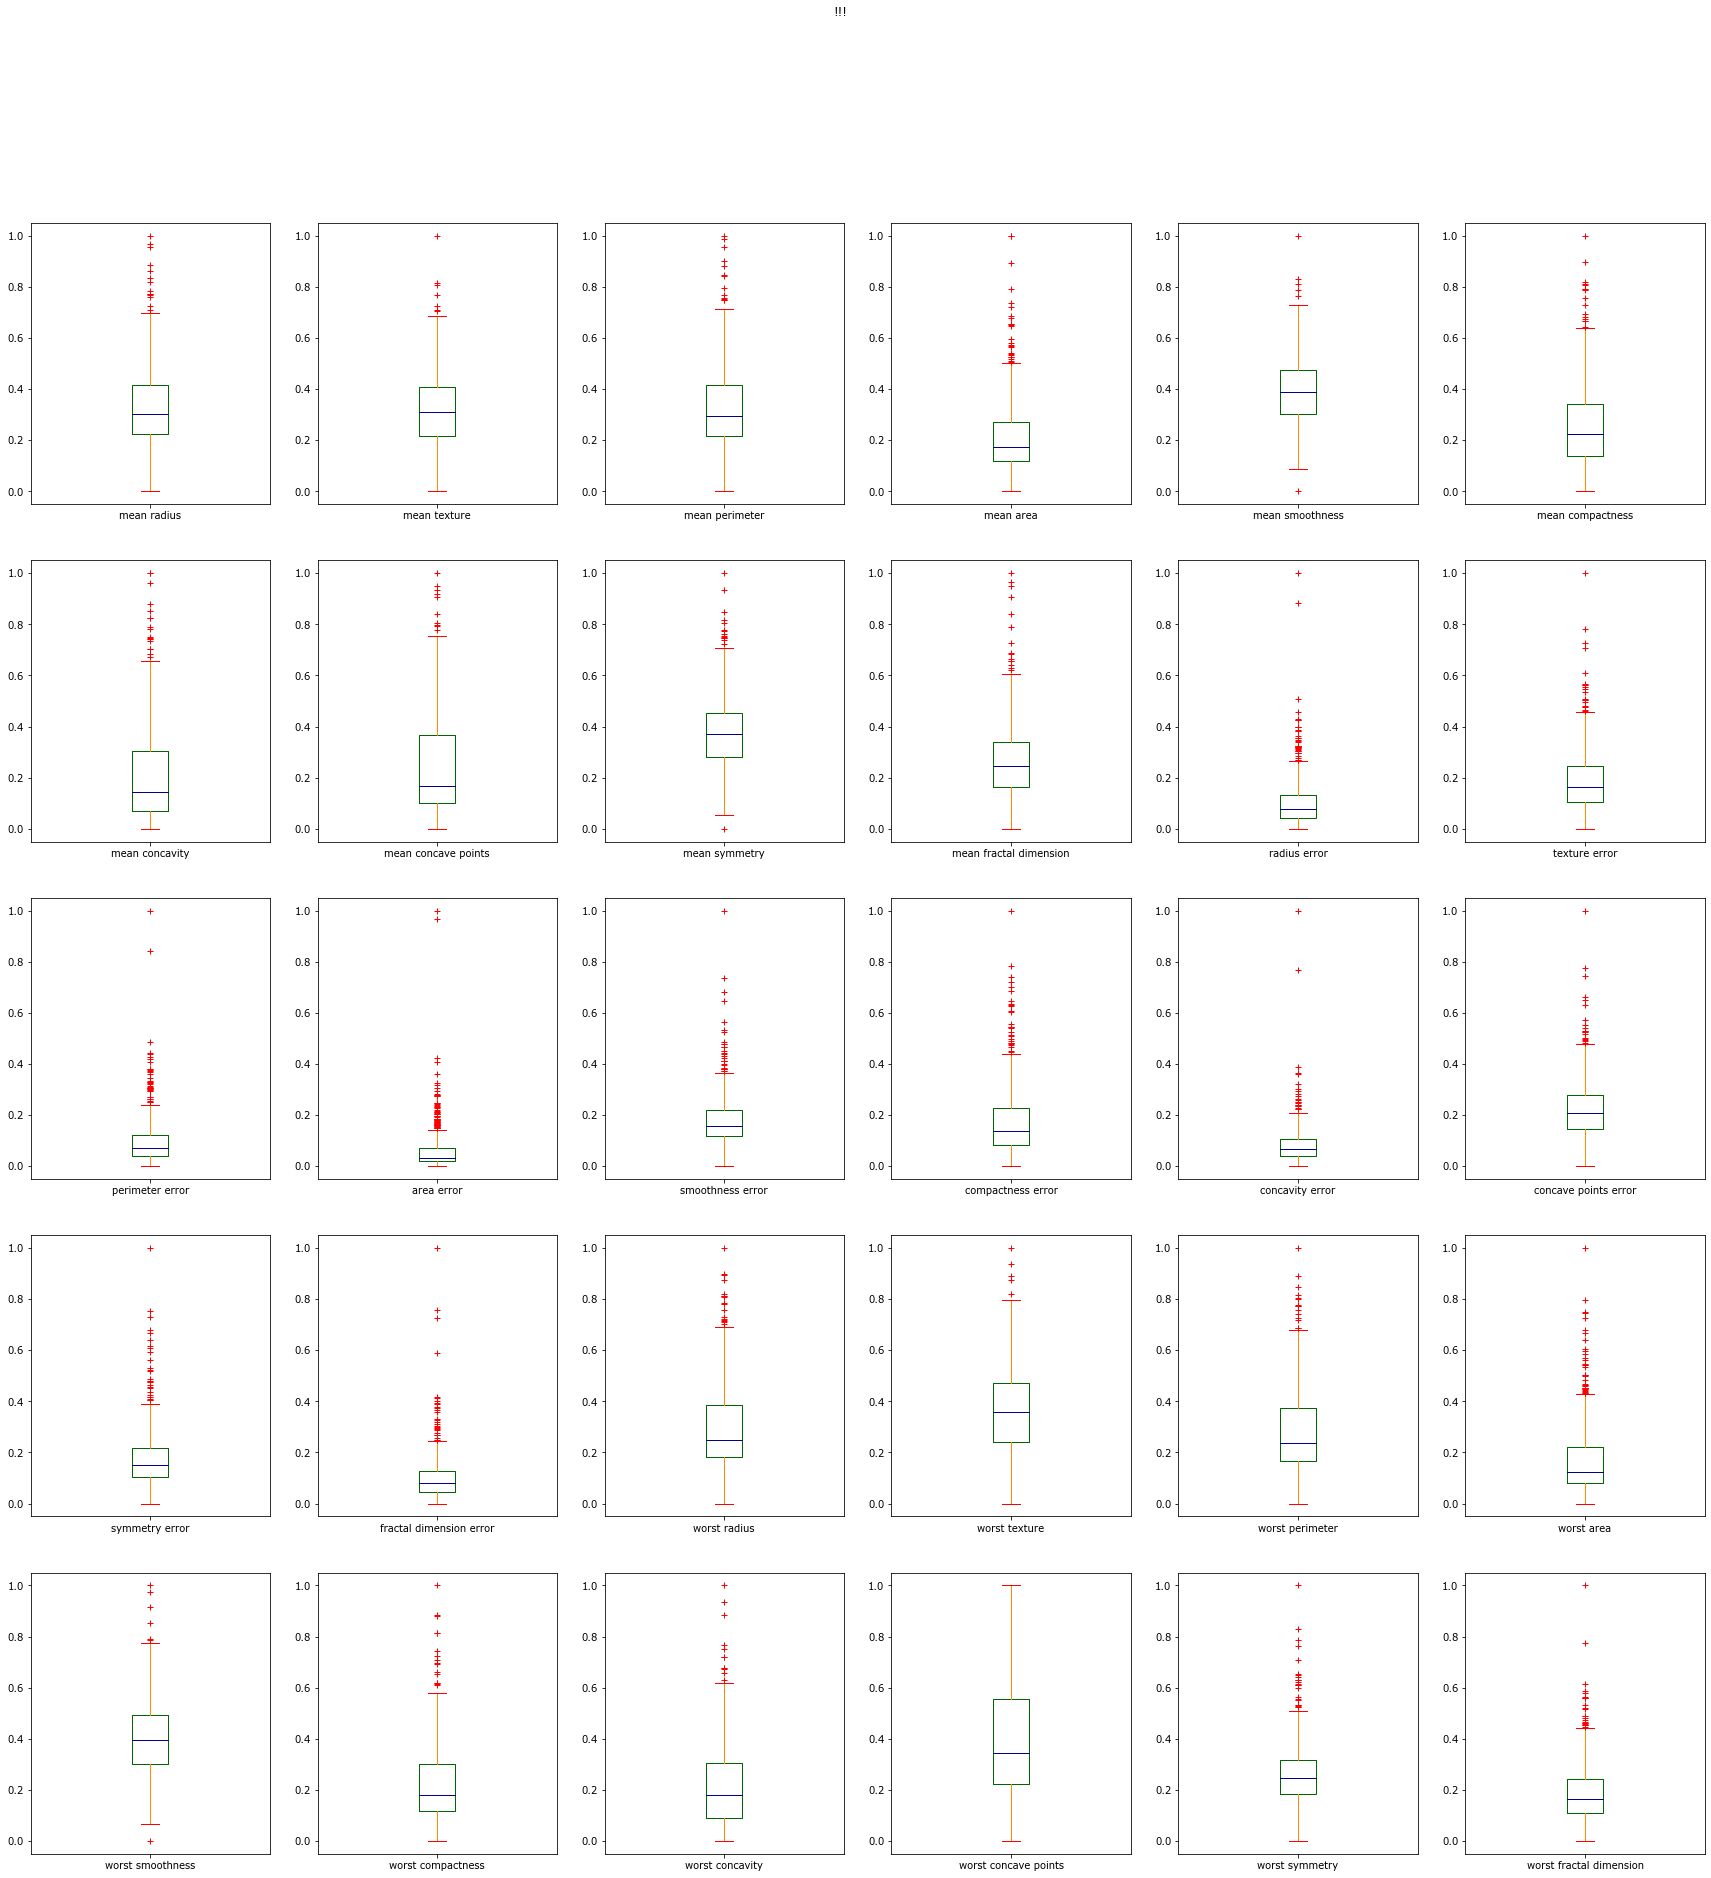

In [28]:
scaler = MinMaxScaler()
X = data.data
X = scaler.fit_transform(X)
data_df = pd.DataFrame(X,columns= data.feature_names)
fig , axes = plt.subplots(5,6,figsize=(30, 30))
data_df.plot(kind='box' ,ax = axes,subplots =True, title = '!!!',color = color,sym = 'r+',figsize=(8, 8))

看看資料分布的情況，在有domain knowledge 得情況下可能可以做些調整 EX 刪除feature 辨識那些極端值為outlier/noise 或是重要資訊需要特別考慮，不過這裡我沒有

##### 3-2  Please split the data with training ratio 0.8, and fit the SVM with your own hyper parameters (at least two sets of parameters). Also, draw the ROC curve and calculate the AUC score of the testing data to compare the performance of two models. (Note. The tutorial considers only one decision threshold, you should think about how to draw the ROC curve with defferent decision threshold) (20%)

In [29]:
data_df['target'] = data.target
y = data_df['target']
X = data_df.drop('target' ,axis =1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
tuned_parameters = [{'kernel':['linear','rbf','poly'],'C':[1,10],'gamma':[0.2,1],'degree':[1,2]}]

clf = GridSearchCV(SVC(),tuned_parameters , cv =2,scoring= 'accuracy')
clf.fit(X_train , y_train)
print(clf.best_params_)


{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}


use {'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'} by gridsearch

and use {'C': 10, 'degree': 10, 'gamma': 10, 'kernel': 'poly'} as a bad choice
 

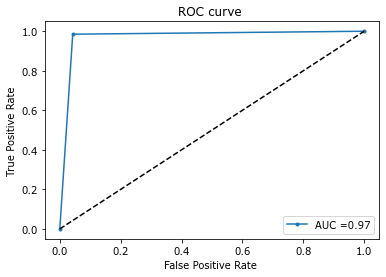

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_pred1 = clf.predict(X_test)
y_trainpred1 = clf.predict(X_train)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
auc1 = auc(fpr1,tpr1)
plt.figure(figsize=(6,4))
plt.title('ROC curve ')
plt.plot(fpr1, tpr1,marker ='.',label = 'AUC =%0.2f'%auc1)
plt.legend(loc ='lower right')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.show()


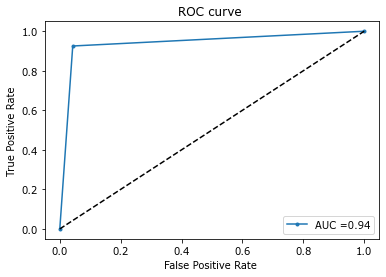

In [32]:
clf2 = SVC(kernel = 'poly', degree=10,C=10,gamma=10)
clf2.fit(X_train ,y_train)
y_pred2 = clf2.predict(X_test)
y_trainpred2 = clf2.predict(X_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
auc2 = auc(fpr2,tpr2)
plt.figure(figsize=(6,4))
plt.title('ROC curve ')
plt.plot(fpr2, tpr2,marker='.',label = 'AUC =%0.2f'%auc2)
plt.legend(loc ='lower right')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.show()

##### 3-3 Compare the models from question 3-2 and choose the best parameter and corresponding model to draw the cofusion matrix of training data and testing data, and calculate the accuracy, precision, recall and F1-score. (10%)

Accuracy: 0.9824175824175824
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       165
           1       0.98      1.00      0.99       290

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455

Best score is: 0.9802438364634052


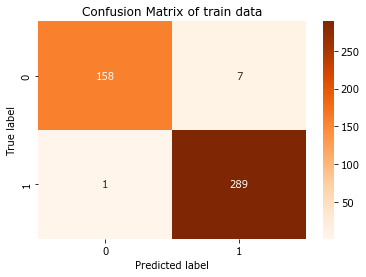

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
y_trainpred = clf.predict(X_train)
print("Accuracy: {}".format(clf.score(X_train, y_train)))
print(classification_report(y_train, y_trainpred))
print("Best score is: {}".format(clf.best_score_))

ConfMatrix = confusion_matrix(y_train,y_trainpred)
sns.heatmap(ConfMatrix,annot=True, cmap="Oranges", fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix of train data");



Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Best score is: 0.9802438364634052


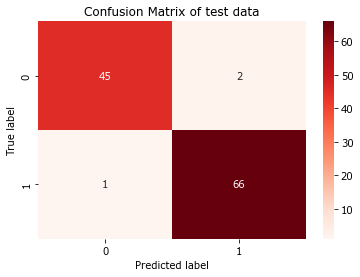

In [34]:
y_pred = clf.predict(X_test)
print("Accuracy: {}".format(clf.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Best score is: {}".format(clf.best_score_))

ConfMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix of test data");


在train and test 資料上表現都不錯，可以說大概是一個不錯的model了